In [1]:
# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\ADI\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_model(model_name="gpt2"):
    try:
        # Load the tokenizer and model
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForCausalLM.from_pretrained(model_name)
        return tokenizer, model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None

In [3]:
def generate_text(prompt, tokenizer, model, max_length=50, temperature=0.7):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt")
    
    # Adding attention_mask and pad_token_id explicitly
    attention_mask = inputs.get("attention_mask", torch.ones(inputs.input_ids.shape, dtype=torch.long))
    pad_token_id = tokenizer.eos_token_id  # or a specific pad token if available

    # Generate text
    outputs = model.generate(
        inputs.input_ids,
        max_length=max_length,
        temperature=temperature,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        attention_mask=attention_mask,
        pad_token_id=pad_token_id
    )
    
    # Decode and return the generated text
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [4]:
# Load pre-trained GPT-2 model and tokenizer
tokenizer, model = load_model("gpt2")

Model and Tokenizer loaded successfully.


c:\Users\ADI\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Response: Explain the Central Limit Theorem in simple terms: If the central limit is zero, then the value of the sum of all the values of a given value is equal to the total of those values. If there is no central limiting, the result
Prompt 1: Explain the Central Limit Theorem in simple terms:
Response 1: Explain the Central Limit Theorem in simple terms: If the central limit is zero, then the value of the sum of all the values of a given value is equal to the total of those values. If there is no central limiting, the result
--------------------------------------------------
Prompt 2: What are the key differences between RNNs and Transformers?
Response 2: What are the key differences between RNNs and Transformers?

RNN's are a bit more complex than Transformers. They're not just a set of instructions. RNG is a very simple set. It's a simple, simple program.
--------------------------------------------------
Prompt 3: Describe the main steps in deploying a machine learning model to pr

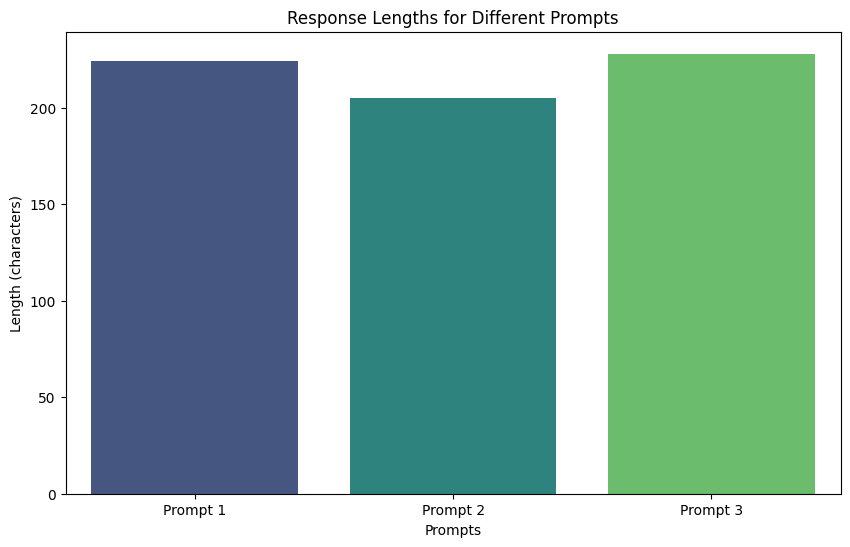

In [5]:
# Ensure model and tokenizer are loaded
if tokenizer is None or model is None:
    print("Model or Tokenizer loading failed. Check your internet connection or try again later.")
else:
    print("Model and Tokenizer loaded successfully.")

    # Example prompt
    prompt = "Explain the Central Limit Theorem in simple terms:"
    response = generate_text(prompt, tokenizer, model)  # Pass tokenizer and model
    print("Response:", response)

    # Prompts to analyze
    prompts = [
        "Explain the Central Limit Theorem in simple terms:",
        "What are the key differences between RNNs and Transformers?",
        "Describe the main steps in deploying a machine learning model to production."
    ]

    # Collect responses (ensure tokenizer and model are passed)
    responses = [generate_text(prompt, tokenizer, model) for prompt in prompts]  # Pass tokenizer and model

    # Display responses
    for i, (prompt, response) in enumerate(zip(prompts, responses)):
        print(f"Prompt {i+1}: {prompt}")
        print(f"Response {i+1}: {response}\n{'-'*50}")

    # Visualize response lengths
    response_lengths = [len(response) for response in responses]

    # Plot response lengths
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[f"Prompt {i+1}" for i in range(len(prompts))], 
                y=response_lengths, 
                palette="viridis", 
                hue=[f"Prompt {i+1}" for i in range(len(prompts))],
                legend=False)
    plt.title("Response Lengths for Different Prompts")
    plt.ylabel("Length (characters)")
    plt.xlabel("Prompts")
    plt.show()